In [29]:
# That set-up stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In this tutorial you are going to see a bit more about the action of matrices, and also build your first machine learning model with scikit-learn. 

# Matrices

Put the following five matrices into numpy arrays:

   $A = \begin{pmatrix} \frac{1}{2} & 0 \\ 0 & 2 \end{pmatrix}$
   $B = \begin{pmatrix} 1 & \frac{1}{2} \\ 0 & 1 \end{pmatrix}$
   $C = \begin{pmatrix} \cos \frac{\pi}{6} & -\sin \frac{\pi}{6} \\ \sin \frac{\pi}{6}& \cos \frac{\pi}{6} \end{pmatrix}$
   $D = \begin{pmatrix} 1 & -1 \\ -1 & 1 \end{pmatrix}$
   $E = \begin{pmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{pmatrix} $

In [71]:
a11 = np.cos(np.pi/6)
a12 = -np.sin(np.pi/6)
a21 = np.sin(np.pi/6)
a22 = np.cos(np.pi/6)
C = np.array([
    [a11, a12],
    [a21, a22]
])

To work out what a matrix does, one way is to visual it's effect on something. We'll start with a simple grid.

One way to make a grid is using `mgrid`, which returns a set of coordinate points. The x coordinates are in `im[0,:,:]` and the y coordinates are in `im[1,:,:]`. We make it using the following command:

In [72]:
# a dense 2d mesh grid
im = np.mgrid[0:3,0:3]

# numpy.linspace creates an array of 9 linearly placed elements between -4 and 4, both inclusive  
# y = np.linspace(-5, 5, 11)

Take a look at the contents of im, and make sure you understand it. Check the shape, print a few points out. And the plot the points. You should see a 3 by 3 grid of points. Initially, plot them as points (use `'.'` in the plot command to specify this), but it will be helpful to plot them as lines instead (just don't use '.' in the plot command).

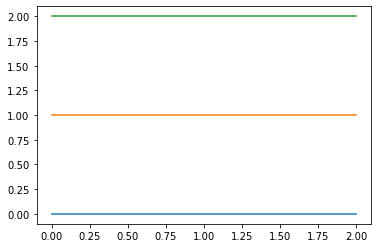

In [73]:
x_coordinates = im[0,:,:]
y_coordinates = im[1,:,:]

pl.plot(x_coordinates, y_coordinates)

We can now transform the coordinates of the each of the points using one of the matrices we specified above. 

Make a new array that is the same size as im, called newim, but containing only zeros. 

In [74]:
# shape a matrix to an array
shape = np.shape(im)

new_im = np.zeros(shape)

Now write 2 loops, one which goes over the x coordinates (remember there are 3 of them), and one over the y coordinates (there are also three of these), and multiply each coordinate pair by one of the matrices (use `np.dot`). Then plot the result.

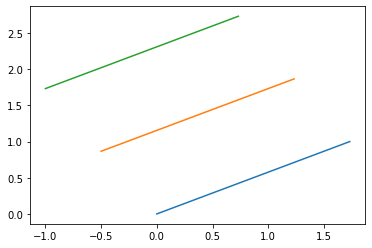

In [75]:
for i in range(3):
    for j in range(3):
        a_ij = im[:,i,j]
        new_im[:,i,j] = np.dot(C, a_ij)
        
pl.plot(new_im[0,:,:], new_im[1,:,:])

Use that to work out what each of the matrices specified above is doing. Write your answers below.

Answer:

https://www.mathsisfun.com/algebra/vectors-dot-product.html

Dot/scalar product gives a scalar (ordinary number) answer.

Cross/vector product gives a vector as an answer.

Each of 3 vectors/matrices have changes their direction and magnitude after the dot product.

## Images not lines

We can do exactly the same transform to an image with a bit more work. To load an image into Python we can use the following code (it's easier to use a greyscale image, so I've given you one of some kakapo chicks):

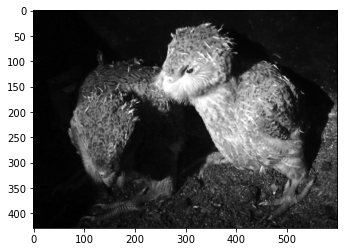

In [76]:
import imageio 
intensities = imageio.imread('../../res/cute.jpeg')

# image show
pl.imshow(intensities,cmap='gray');

We now do exactly the same thing as we did with the 3 by 3 block, but with the whole image. The concepts are the same, but the code is a bit harder.

Get the size of the image called intensities.

Make a new array called im, which is size (3,width of image, height of image). When you make it, specify that the contents should be integers not floats. To do this, use `np.zeros((size here)).astype(int)`

Use `np.mgrid` to put a set of coordinates in the first two dimensions of the matrix. And then put the intensity values into the third dimension. 

In [77]:
x,y = np.shape(intensities)

shape = (3,x,y)
im = np.zeros(shape, dtype=int)

# put a set of coordinates in the first 2 dimensions of the matrix
im[0:2,:,:] = np.mgrid[0:x, 0:y]

# put the intensity values into the 3rd dimension
im[2,:,:] = intensities

We start by doing the exact same thing as with the 3 by 3 grid above. Make a new array called `newim` that is the same size, and all zero integers. 

Then loop over the $x$ and $y$ coordinates of the image with 2 loops, and transform the coordinates (but not the intensities) with one of the matrices. Use `i` and `j` as your loop variables.

The extra piece of work we need to do comes after that. We need to put intensity values into the `newim` array. The trick to see how to do this is that `newim[0,i,j]` holds the $x$ coordinates, and `newim[1,i,j]` holds the $y$ coordinates. So if `newim[0,i,j]` is a good index (and the same for `newim[1,i,j]`) then `im[2,newim[0,i,j],newim[1,i,j]]` holds the intensity at that point in the original image. So we just copy that into the new array. What do I mean by a good index? Some of the points might not be in the original image -- they would be smaller than 0, or bigger than the width or height. In that case we should make them white instead. 

You might be wandering how to do that. 

The code is:

1. make the new im array
2. write the loops
3. inside the loops, apply a matrix to the coordinates
4. still inside the loops, now check if this is a good coordinate, if so copy the intensity, otherwise make it white:
`        
        if newim[0,i,j]>=0 and newim[0,i,j]<x and newim[1,i,j]>=0 and newim[1,i,j]<y:
            newim[2,i,j] = im[2,newim[0,i,j],newim[1,i,j]]
        else: 
            newim[2,i,j] = 255
`

In [78]:
new_im = np.zeros(shape, dtype=int)

for i in range(x):
    for j in range(y):
        # dot product to create new vector with new direction and new magnitude
        new_im[:2,i,j] = np.dot(C, im[:2,i,j])
        first_dimen = new_im[0,i,j]
        second_dimen = new_im[1,i,j]
        
        if first_dimen>=0 and first_dimen<x and second_dimen>=0 and second_dimen<y:
            new_im[2,i,j] = im[2, first_dimen, second_dimen]
        else:
            # byte_max_index = 255 (0 -> 255 = white color
            new_im[2,i,j] = 255

Now plot the image. You will see that a lot of it is missing. The reason it that's it's gone outside the image domain. 

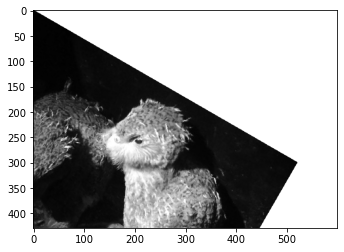

In [79]:
pl.imshow(new_im[2,:,:],cmap='gray')

We can do two things about the image going off the edge. One is to translate the image so that we rotate it about the centre, not the corner. And the second is put it on a bigger background. We will do both. We'll start by translating about the centre. To get an integer value from division in Python, use `//2` instead of `/2`. So subtract off half of the width and height of the image from the coordinates in `im[0,:,:]` and `im[1,:,:]`, so that (0,0) is in the centre.

In [84]:
im[0,:,:] -= x//2    # to get an integer value from division
im[1,:,:] -= y//2

The code above is nearly the same, but you need to add the half image back on to the newim coordinates so that you can plot them correctly. 

In [85]:
# The elements of the shape tuple give 
# the lengths of the corresponding array dimensions.
shape = np.shape(im)
new_im = np.zeros(shape, dtype = int)

x_img = x
y_img = y

for i in range(x_img):
    for j in range(y_img):
        img_content = im[:2,i,j]
        im_new_direct = np.dot(C, img_content)
        center = np.array([x//2,y//2])
        new_im[:2,i,j] = im_new_direct + center
        
        first_dimen = new_im[0,i,j]
        second_dimen = new_im[1,i,j]
        if first_dimen >= 0 and first_dimen < x and second_dimen >= 0 and second_dimen < y:
            new_im[2,i,j] = im[2,first_dimen, second_dimen]
        else:
            new_im[2,i,j] = 255

Now when you plot it you should see most of the picture. 

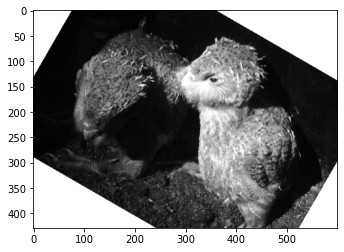

In [97]:
pl.imshow(new_im[2,:,:],cmap='gray')

To make the picture bigger, we can just make the pixel grid by 1000 by 1000 (since those are the biggest values we can see because of the size of the image and basic trigonometry) and put the image itself in the middle. Then everything else should work exactly the same. 

In [101]:
xx = 1000
yy = 1000

shape_3d = (3,xx,yy)
im2 = np.zeros(shape_3d, dtype = int)

# matrix grid
im2[0:2,:,:] = np.mgrid[0:xx,0:yy]
im2[0,:,:] -= xx//2
im2[1,:,:] -= yy//2

im2[2,xx//2-x//2:xx//2+x//2+1,yy//2-y//2:yy//2+y//2] = intensities

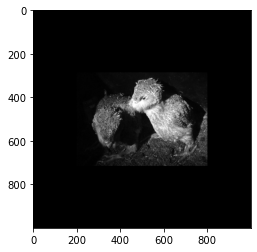

In [102]:
pl.imshow(im2[2,:,:],cmap='gray');

In [106]:
shape = np.shape(im2)
new_im2 = np.zeros(shape, dtype = int)
for i in range(xx):
    for j in range(yy):
        first_dimen = new_im2[0,i,j]
        second_dimen = new_im2[1,i,j]
        all_dimen = new_im2[:2,i,j]
        
        new_direct = np.dot(C, all_dimen)
        
        center_x = xx//2
        center_y = yy//2
        arr_like = [center_x, center_y]
        matrix = np.array(arr_like)
        
        new_im2[:2,i,j] = new_direct + matrix
        if first_dimen >= 0 and first_dimen < xx and second_dimen >= 0 and second_dimen < yy:
            new_im2[2,i,j] = im2[2,first_dimen, second_dimen]
        else:
            new_im2[2,i,j] = 255

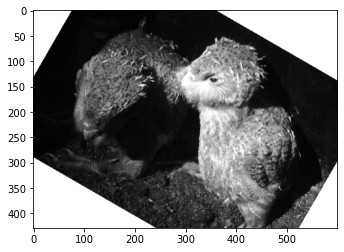

In [109]:
img_content = new_im[2,:,:]
pl.imshow(img_content, cmap='gray')

# Scikit-Learn

We are going to see two very simple examples of using scikit-learn.

## A simple regression task

North Island Brown Kiwi were introduced into the Remutaka Forest Park between 2006 and 2011, with around 30 being introduced by the end of 2010. Since then they have done quite well in the park, and are spreading through the Whakanui section of the Remutakas (close to Wainuiomata). 

We don't know exactly how many there are, since we don't monitor all the birds, and they are pretty cryptic animals. But the estimates for the numbers are:

In [114]:
all_row = -1
one_col = 1

year = np.arange(2010, 2021).reshape(all_row, one_col)

nkiwi = np.array([31, 27, 22, 22, 32, 40, 47, 52, 62, 76, 90]).reshape(all_row, one_col)

Plot the data

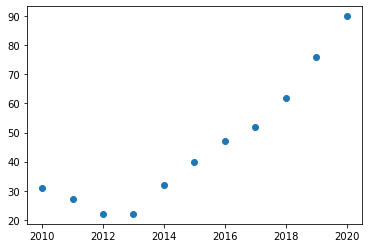

In [115]:
pl.plot(year, nkiwi,'o')

The code below fits the linear regression and gets the fitted points

In [141]:
from sklearn.linear_model import LinearRegression

x = year
y = nkiwi
reg = LinearRegression().fit(x, y)

# R-squared
coef_deter = reg.score(x, y)
slope = reg.coef_
intercept = reg.intercept_

train_pred = reg.predict(x)

Compute the predictions for the next 10 years, and plot both the current fit and prediction line on the graph.

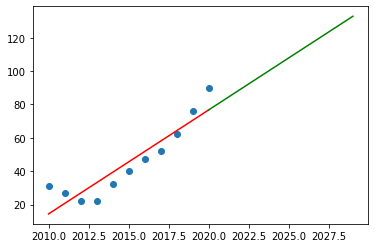

In [144]:
last_year = max(year) - 1
future_first = last_year + 1
future_end = future_first + 10

future = np.arange(future_first, future_end)

# to X col <=> vertical
future = future.reshape(-1,1)

x_test = future
test_pred = reg.predict(x_test)

row_total = 1
col_total = 1
figure, axis = pl.subplots(row_total, col_total)
pl.plot(x,y,'o')
pl.plot(x,train_pred,'r')
pl.plot(x_test, test_pred,'g')

Fit the data to the log of the counts instead, and start the regression from 2013. What difference do these things make?

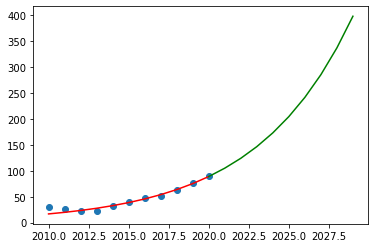

In [137]:
# get the index of 2013
year_2013 = year[4:]
x_2013 = year_2013

nkiwi_2013 = nkiwi[4:]
y_2013 = np.log(nkiwi_2013)

reg = LinearRegression().fit(x_2013,y_2013)
coef_deter = reg.score(x_2013,y_2013)
slope = reg.coef_
intercept = reg.intercept_

x_train = year
x_test = future

y = nkiwi

train_pred = reg.predict(x_train)
test_pred = reg.predict(x_test)

#The exponential function is e^x 
#where e is a mathematical constant called Euler's number, approximately 2.718281
#This value has a close mathematical relationship with pi 
#and the slope of the curve e^x is equal to its value at every point. 
#np.exp() calculates e^x for each value of x in your input array.
train_pred = np.exp(train_pred)
test_pred = np.exp(test_pred)

figure, axis = pl.subplots(row_total, col_total)

pl.plot(x_train,y,'o')
pl.plot(x_train,train_pred,'r')
pl.plot(x_test,test_pred,'g')

# A simple clustering task

The toadstool data on Blackboard is a count of the number of ten different sorts of toadstool in Liphook forest in the UK, collected by Peter Shaw. Load the data and take a look at it.  

In [158]:
df = pd.read_csv('../../res/data/toadstool.csv')
df

,Species,1986,1987,1988,1989,1990
0,Boletus ferrugineus,0,7,18,17,7
1,Cortinarius semisanguineus,0,0,12,45,151
2,Gomphidius roseus,0,99,430,896,222
3,Inocybe lacera,0,0,16,1,6
4,Laccaria proxima,567,2759,3868,182,266
5,Lactarius rufus,0,0,0,2,47
6,Paxillusin volutus,117,131,20,21,40
7,Suillus bovinus,0,219,2982,5823,2427
8,Suillus luteus,0,0,11,12,23
9,Suillus variegatus,0,2,151,534,154


One way to cluster is called Aglomerative Clustering, which tries to merge the points into groups to form clusters.  The cell below imports the code, and then calls it on this data in two different ways. Try to work out what is happening by reading the code.

In [157]:
# Unsupervised learning
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# all rows, start from the 2nd col: 1986
data = df.iloc[:,1:]

s = StandardScaler()
s.fit(data)
data = s.transform(data)

clustering1 = AgglomerativeClustering(n_clusters=3).fit(data.T)
clustering2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#clustering1.labels_

We first transform the data with the standard scaler. Then the two versions take the same input and work on clustering the years of data based on the species that were found that year. Both take the numerical values. The first version aims to get 3 clusters, while the second constructs the whole decomposition. 

It is common to use presence/absence data instead of counts. Convert any number greater than 0 to be the value 1, which is known as binarising the data.

In [161]:
data = df.iloc[:,1:].to_numpy()
data = np.where(data>0,1,0)    #if data > 0: 1 else: 0

If you do that, Euclidean distances aren't very useful any more, since the data positions don't mean much. One option is to compute a distance that looks at how often the points match, such as the Jaccard score. The following code compute the Jaccard scores for this data. We can tell the clustering method to use these distances instead of the Euclidean by passing it. Run the code and compare the results 

In [168]:
from sklearn.metrics import jaccard_score

arr_like = np.shape(data)[1]
dists = np.zeros((arr_like, arr_like))
for i in range(arr_like):
    for j in range(i+1, arr_like):
        dists[i,j] = jaccard_score(data[:,i], data[:,j])
dists = dists+dists.T

In [169]:
clustering3 = AgglomerativeClustering(affinity='precomputed',linkage='complete',n_clusters=3).fit(dists.T)
print(clustering3.labels_)

[0 0 2 0 1]
